# Laboratorio 6

* Asuma que las operaciones requieren alta precisión.
* Presente su solución con el nombre `lab6_codigoPUCP.ipynb`

In [1]:
import numpy
ns = 2**numpy.arange(5,15)
print(ns)

[   32    64   128   256   512  1024  2048  4096  8192 16384]


In [2]:
! rm *.c *.so

a) Implementar (en un único archivo) cuatro funciones en C que acumulen los elementos de una matriz cuadrada de números reales. Solo puede emplear un único bucle `for`. En la primera función realizar la acumulación elemento a elemento, en la segunda acumule en bloques de 2 elementos, en la tercera acumule en bloques de 4 elementos, y en la cuarta acumule en bloques de 8 elementos. (2.0 ptos)

In [3]:
%%file funciones.c

double funcion_1(double *arr, int N){
    double suma=0.0;
    int p= N*N;
    for (int i =0; i < p;i++){
        suma += arr[i];
    }
    return suma;
}
double funcion_2(double *arr, int N){
    double suma=0.0;
    int p= N*N;
    for (int i =0; i <p; i+=2){
        suma += (arr[i]+ arr[i+1]);

    }
    return suma;
}
double funcion_3(double *arr, int N){
    double suma=0.0;
    int p= N*N;
    for (int i =0; i <p; i+=4){
        suma += (arr[i]+ arr[i+1]+ arr[i+2]+arr[i+3]);
    }
    return suma;
}
double funcion_4(double *arr, int N){
    double suma=0.0;
    int p= N*N;
    for (int i =0; i <p; i+=8){
        suma+= (arr[i]+ arr[i+1]+ arr[i+2]+arr[i+3] +arr[i+4] +arr[i+5] +arr[i+6] +arr[i+7]);
    }
    return suma;
}

Writing funciones.c


b) Coloque el comando para generar la librería dinámica del ítem (a) y genere la librería dinámica. (0.25 ptos)

In [4]:
! gcc -c  funciones.c

In [5]:
! gcc -shared funciones.o -o funciones.so 

c) Implemente una función que vincule la librería dinámica generada en el ítem (b) con Python usando `ctypes`. La función no recibe argumentos y debe devolver las cuatro funciones configuradas listas para su uso. (0.5 ptos)

In [6]:
import ctypes

In [7]:
def ctypes_funciones():

    lib= './funciones.so'
    lib=ctypes.CDLL(lib)
    #Primera funcion
    lib.funcion_1.argtypes=[numpy.ctypeslib.ndpointer(dtype=numpy.double), ctypes.c_int32]
    lib.funcion_1.restype=ctypes.c_double
    #Segunda funcion
    lib.funcion_2.argtypes=[numpy.ctypeslib.ndpointer(dtype=numpy.double), ctypes.c_int32]
    lib.funcion_2.restype=ctypes.c_double
    #Tercera funcion
    lib.funcion_3.argtypes=[numpy.ctypeslib.ndpointer(dtype=numpy.double), ctypes.c_int32]
    lib.funcion_3.restype=ctypes.c_double
    #Cuarta funcion
    lib.funcion_4.argtypes=[numpy.ctypeslib.ndpointer(dtype=numpy.double), ctypes.c_int32]
    lib.funcion_4.restype=ctypes.c_double

    return lib.funcion_1,lib.funcion_2,lib.funcion_3,lib.funcion_4

d) Haga una instancia de las cuatro funciones a partir de su función en el ítem (c) (0.25 ptos)

In [8]:
c_funcion1,c_funcion2,c_funcion3,c_funcion4 =ctypes_funciones()

e) Pruebe todas sus funciones obtenidas en el ítem (d) para el menor de los valores de `ns` y la variable `Y`, y muestre que dan el mismo resultado. (0.25 ptos)

In [9]:
n = ns[0]
A = numpy.random.rand(n,n)
Y = A.flatten()

In [10]:
c_funcion1(Y, n)

494.85124917840244

In [11]:
c_funcion2(Y,n)

494.8512491784022

In [12]:
c_funcion3(Y,n)

494.8512491784024

In [13]:
c_funcion4(Y,n)

494.85124917840227

f) Pruebe todas sus funciones obtenidas en el ítem (d) para el mayor de los valores de `ns` y la variable `Y`, y muestre que dan el mismo resultado. (0.25 ptos)

In [14]:
n = ns[-1]
A = numpy.random.rand(n,n)
Y = A.flatten()


In [15]:
c_funcion1(Y,n)

134224841.80448583

In [16]:
c_funcion2(Y,n)

134224841.80438313

In [17]:
c_funcion3(Y,n)

134224841.80442366

In [18]:
c_funcion4(Y,n)

134224841.804412

g) Realice 50 mediciones de tiempo para todas sus funciones, y para todos los valores de `ns`. El valor representativo de las 50 mediciones será la mediana. (0.5 ptos)

In [19]:
import time
import statistics
import matplotlib.pyplot as plt

In [20]:
#ns <- es el arreglo del tamaño

l_1=[]
l_2=[]
l_3=[]
l_4=[]

iterations=50
for n in ns:
    A = numpy.random.rand(n,n)
    Y = A.flatten()
    lista_1=[]
    lista_2=[]
    lista_3=[]
    lista_4=[]
    for _ in range(iterations):

        t1= time.perf_counter()
        c_funcion1(Y,n)
        t2= time.perf_counter()
        lista_1.append(t2-t1)

        t1= time.perf_counter()
        c_funcion2(Y,n)
        t2= time.perf_counter()
        lista_2.append(t2-t1)

        t1= time.perf_counter()
        c_funcion3(Y,n)
        t2= time.perf_counter()
        lista_3.append(t2-t1)

        t1= time.perf_counter()
        c_funcion4(Y,n)
        t2= time.perf_counter()
        lista_4.append(t2-t1)
    l_1.append(statistics.median(lista_1))
    l_2.append(statistics.median(lista_2))
    l_3.append(statistics.median(lista_3))
    l_4.append(statistics.median(lista_4))




32
64
128
256
512
1024
2048
4096
8192
16384


h) Presente una gráfica en la que muestre como varía el tiempo de ejecución respecto del valor de `ns`. Solo para los cinco primeros valores de `ns`. (0.25 ptos)

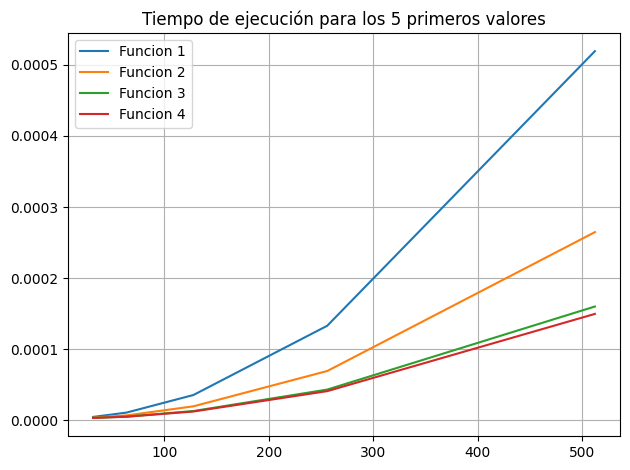

In [21]:
plt.plot(ns[:5],l_1[:5], label = 'Funcion 1')
plt.plot(ns[:5],l_2[:5], label = 'Funcion 2')
plt.plot(ns[:5],l_3[:5], label = 'Funcion 3')
plt.plot(ns[:5],l_4[:5], label = 'Funcion 4')
plt.legend()
plt.grid(True)
plt.title(f'Tiempo de ejecución para los 5 primeros valores')
plt.tight_layout()

i) Presente una gráfica en la que muestre como varía el tiempo de ejecución respecto del valor de `ns`. Solo para los cinco últimos valores de `ns`. (0.25 ptos)

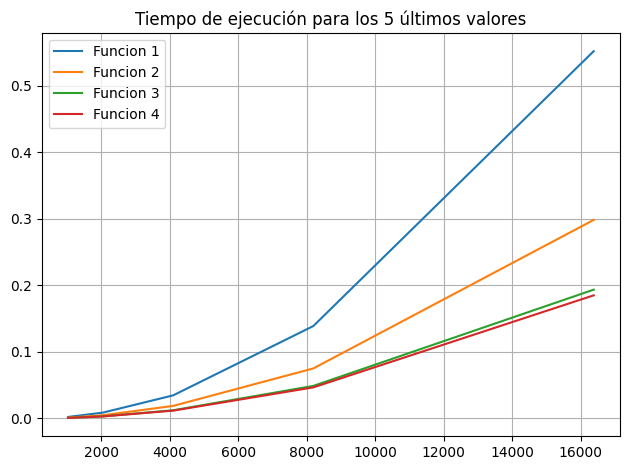

In [22]:
plt.plot(ns[5:],l_1[5:], label = 'Funcion 1')
plt.plot(ns[5:],l_2[5:], label = 'Funcion 2')
plt.plot(ns[5:],l_3[5:], label = 'Funcion 3')
plt.plot(ns[5:],l_4[5:], label = 'Funcion 4')
plt.legend()
plt.grid(True)
plt.title(f'Tiempo de ejecución para los 5 últimos valores')
plt.tight_layout()

j) Presente una gráfica en la que muestre como varía el *speedup* respecto del valor de `ns`. Solo para los cinco primeros valores de `ns`. Considere como referencia a la función más lenta. (0.25 ptos)

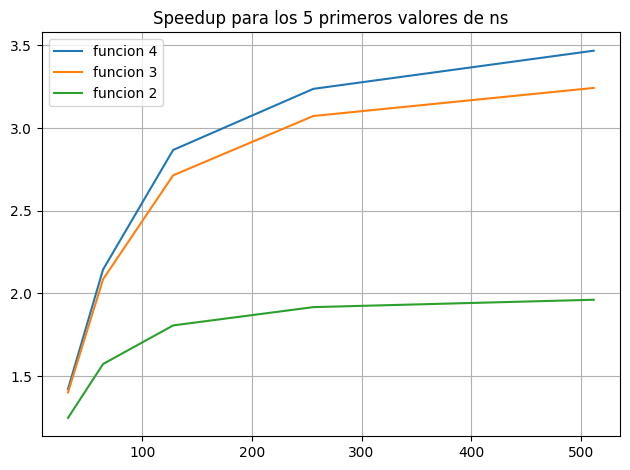

In [23]:

plt.plot(ns[:5], numpy.asarray(l_1[:5])/numpy.asarray(l_4[:5]), label='funcion 4' )
plt.plot(ns[:5], numpy.asarray(l_1[:5])/numpy.asarray(l_3[:5]),label='funcion 3' )
plt.plot(ns[:5], numpy.asarray(l_1[:5])/numpy.asarray(l_2[:5]),label='funcion 2' )
plt.legend()
plt.grid(True)
plt.title('Speedup para los 5 primeros valores de ns')
plt.tight_layout()

k) Presente una gráfica en la que muestre como varía el *speedup* respecto del valor de `ns`. Solo para los cinco últimos valores de `ns`. Considere como referencia a la función más lenta. (0.25 ptos)

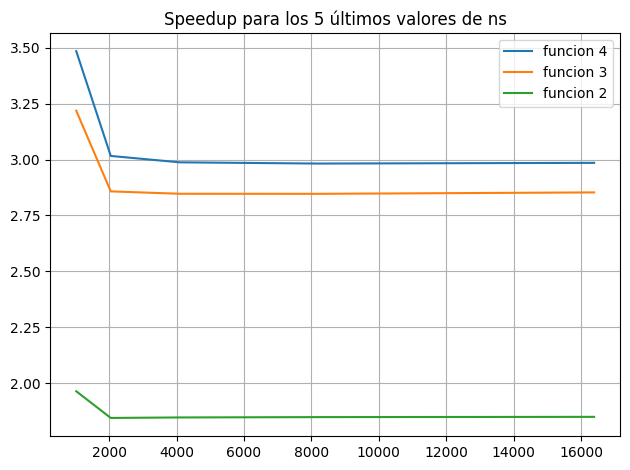

In [24]:
plt.plot(ns[5:], numpy.asarray(l_1[5:])/numpy.asarray(l_4[5:]), label='funcion 4' )
plt.plot(ns[5:], numpy.asarray(l_1[5:])/numpy.asarray(l_3[5:]),label='funcion 3' )
plt.plot(ns[5:], numpy.asarray(l_1[5:])/numpy.asarray(l_2[5:]),label='funcion 2' )
plt.legend()
plt.grid(True)
plt.title('Speedup para los 5 últimos valores de ns')
plt.tight_layout()

l) Implementar (en un único archivo) dos funciones en C que acumulen los elementos de una matriz cuadrada de números reales. Debe emplear dos bucle `for`. En la primera función realizar la acumulación leyendo los elementos por filas, en la segunda acumule leyendo los elementos por columnas. (1.5 ptos)

In [62]:
%%file funciones2.c

double funcion_1(double *arr, int N){
    double suma=0.0;
    for (int j =0; j < N;j++){
        for(int i=0; i<N;i++){
            suma += arr[j*N +i];
        }
    }
    return suma;
}
double funcion_2(double *arr, int N){
    double suma=0.0;
    for (int j =0; j <N; j++){
       for(int i=0; i<N;i++){
            suma += arr[i*N +j];
        }
    }
    return suma;
}


Overwriting funciones2.c


m) Coloque el comando para generar la librería dinámica del ítem (l) y genere la librería dinámica. (0.25 ptos)

In [63]:
! gcc -c funciones2.c

In [64]:
! gcc -shared funciones2.o -o funciones2.so

n) Implemente una función que vincule la librería dinámica generada en el ítem (m) con Python usando `ctypes`. La función no recibe argumentos y debe devolver las dos funciones configuradas listas para su uso. (0.5 ptos)

In [66]:
import ctypes
import numpy


In [67]:
def ctypes_funciones2():

    lib= './funciones2.so'
    lib=ctypes.CDLL(lib)
    #Primera funcion
    lib.funcion_1.argtypes=[numpy.ctypeslib.ndpointer(dtype=numpy.double), ctypes.c_int32]
    lib.funcion_1.restype=ctypes.c_double
    #Segunda funcion
    lib.funcion_2.argtypes=[numpy.ctypeslib.ndpointer(dtype=numpy.double), ctypes.c_int32]
    lib.funcion_2.restype=ctypes.c_double

    return lib.funcion_1,lib.funcion_2

o) Haga una instancia de las dos funciones a partir de su función en el ítem (n) (0.25 ptos)

In [68]:
c_funcion1_2,c_funcion2_2= ctypes_funciones2()

p) Pruebe todas sus funciones obtenidas en el ítem (o) para el menor de los valores de `ns` y muestre que dan el mismo resultado. (0.25 ptos)

In [69]:
n = ns[0]
A = numpy.random.rand(n,n)
Y = A.flatten()

In [70]:
c_funcion1_2(Y,n)

514.6825877588894

In [71]:
c_funcion2_2(Y,n)

514.6825877588894

q) Pruebe todas sus funciones obtenidas en el ítem (o) para el menor de los valores de `ns` y muestre que dan el mismo resultado. (0.25 ptos)

In [72]:
n = ns[-1]
A = numpy.random.rand(n,n)
Y = A.flatten()

In [73]:
c_funcion1_2(Y,n)

133575907.18472357

In [74]:
c_funcion2_2(Y,n)

133575907.18472357

r) Realice 50 mediciones de tiempo para todas sus funciones obtenidas en el ítem (o), y para todos los valores de `ns`. El valor representativo de las 50 mediciones será la mediana. (0.5 ptos)

In [75]:
import time
import statistics

import matplotlib.pyplot as plt


In [76]:
#ns <- es el arreglo del tamaño

l_1=[]
l_2=[]

iterations=10
for n in ns:
    A = numpy.random.rand(n,n)
    Y = A.flatten()
    lista_1=[]
    lista_2=[]

    for _ in range(iterations):

        t1= time.perf_counter()
        c_funcion1_2(Y,n)
        t2= time.perf_counter()
        lista_1.append(t2-t1)

        t1= time.perf_counter()
        c_funcion2_2(Y,n)
        t2= time.perf_counter()
        lista_2.append(t2-t1)

      
    l_1.append(statistics.median(lista_1))
    l_2.append(statistics.median(lista_2))



s) Presente una gráfica en la que muestre como varía el tiempo de ejecución de las instancias del ítem (o) respecto del valor de `ns`. Solo para los cinco primeros valores de `ns`. (0.25 ptos)

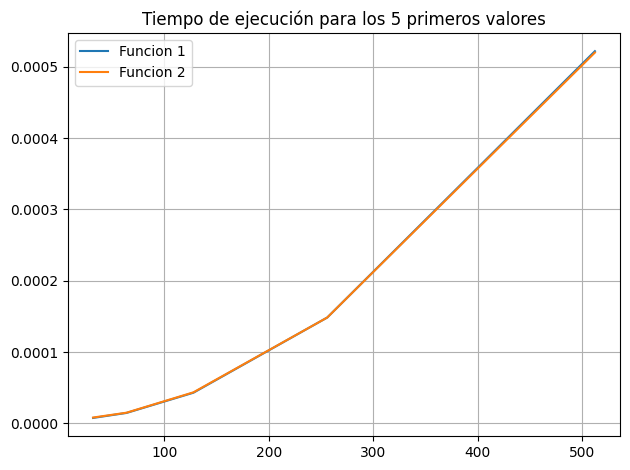

In [77]:
plt.plot(ns[:5],l_1[:5], label = 'Funcion 1')
plt.plot(ns[:5],l_2[:5], label = 'Funcion 2')
plt.legend()
plt.grid(True)
plt.title(f'Tiempo de ejecución para los 5 primeros valores')
plt.tight_layout()

t) Presente una gráfica en la que muestre como varía el tiempo de ejecución de las instancias del ítem (o) respecto del valor de `ns`. Solo para los cinco últimos valores de `ns`. (0.25 ptos)

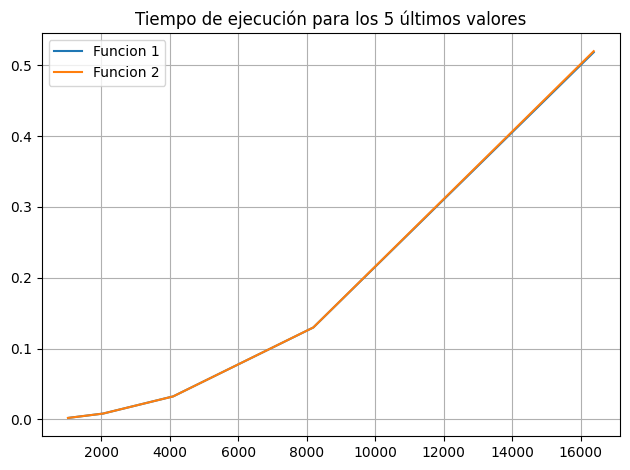

In [78]:
plt.plot(ns[5:],l_1[5:], label = 'Funcion 1')
plt.plot(ns[5:],l_2[5:], label = 'Funcion 2')

plt.legend()
plt.grid(True)
plt.title(f'Tiempo de ejecución para los 5 últimos valores')
plt.tight_layout()

u) Presente una gráfica en la que muestre como varía el *speedup* de las instancias del ítem (o) respecto del valor de `ns`. Solo para los cinco primeros valores de `ns`. Considere como referencia la función más lenta. (0.25 ptos)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


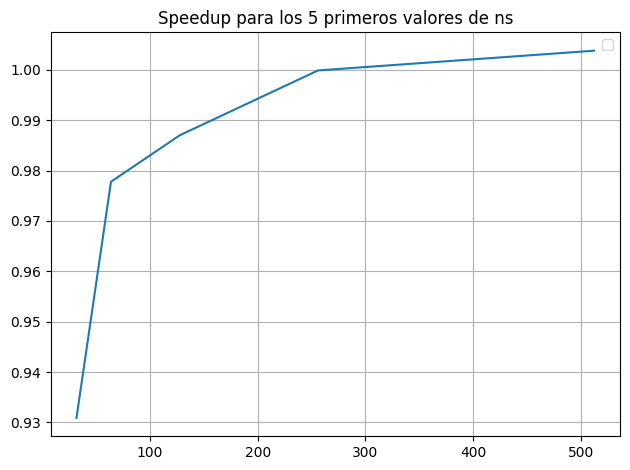

In [79]:

plt.plot(ns[:5], numpy.asarray(l_1[:5])/numpy.asarray(l_2[:5]))

plt.legend()
plt.grid(True)
plt.title('Speedup para los 5 primeros valores de ns')
plt.tight_layout()

v) Compare graficamente las implementaciones de las versiones con un solo bucle `for`, con las implementaciones de las versiones con dos bucle `for`. Presente una gráfica de tiempo de ejecución para todos los tamaños, determine cual es la más rápida y cual es la más lenta. (0.5 ptos)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


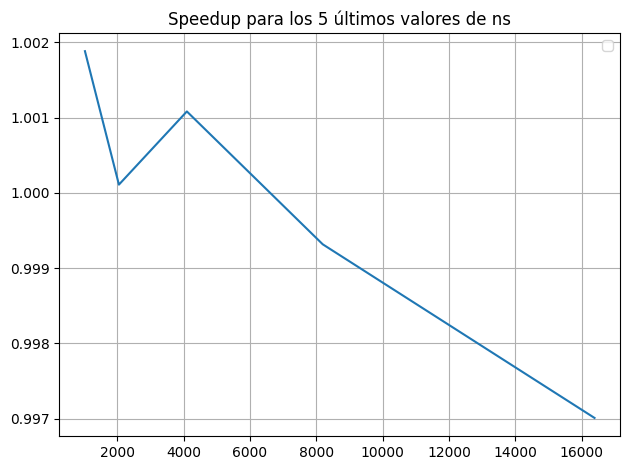

In [80]:
plt.plot(ns[5:], numpy.asarray(l_1[5:])/numpy.asarray(l_2[5:]))
plt.legend()
plt.grid(True)
plt.title('Speedup para los 5 últimos valores de ns')
plt.tight_layout()

w) En base al análisis del ítem (v), presente dos gráficas de *speedup* (de la función más rápida respecto de la más lenta). Una para los primeros cinco tamaños, y otra para los cinco últimos. (0.25 ptos)

x) Explique sus resultados de las implementaciones con un solo bucle `for` empleando conceptos de memoria caché. (2.0 ptos)

y) Explique sus resultados de las implementaciones con dos bucle `for` empleando conceptos de memoria caché. (2.0 ptos)

z) ¿Qué implementación para sumar todos los elementos de una matriz es más eficiente en términos de tiempo de ejecución? ¿Por qué? Explique empleando conceptos de memoria caché. (1.0 pto)